In [ ]:
def pick_starting_position(length):
    # Starting position generated via parametric equations and a random angle
    startingPosition = np.zeros(2)
    
    boundary_points = [(w, h) for w in [0,length-1] for h in range(0,length)]
    boundary_points += [(h, w) for w in [0,length-1] for h in range(0,length)]
    
    if boundary_points == []:
        spawnIdx = -999
        return spawnIdx
    spawnIdx = random.choice(self.boundary_points)
    while self.canvas[spawnIdx[0], spawnIdx[1]] != 0:
        spawnIdx = random.choice(self.boundary_points)
    return spawnIdx    
    
    
    
    randomAngle = np.random.randint(0, 359)
    angleRadians = np.deg2rad(randomAngle)
    x = radius * np.cos(angleRadians)
    y = radius * np.sin(angleRadians)
    startingPosition[0], startingPosition[1] = int((length / 2) + x), int((length / 2) + y)
    return startingPosition

In [15]:
import numpy as np
def spawnParticle(boundary_points):

        if boundary_points == []:
            spawnIdx = -999
            return spawnIdx
        spawnIdx = np.random.choice(boundary_points)
        
        while self.canvas[spawnIdx[0], spawnIdx[1]] != 0:

            spawnIdx = random.choice(self.boundary_points)

        return spawnIdx

In [16]:
spawnParticle(boundary_points)

ValueError: a must be 1-dimensional

In [2]:
from tqdm.notebook import trange, tqdm
import numpy as np
import random
import datetime
class DLA:
    def __init__(self):
        self.instantiate(100, 2000, mode='Default')
        
    def instantiate(self, _shape, _particles, mode='Custom', verbose=False):
        self.canvas_mode = mode
        self.shape = _shape
        self.particles = _particles

        self.canvas = np.zeros([self.shape, self.shape])
        self.canvas[int(self.shape/2)][int(self.shape/2)] = 1

        # length : 4(n-1)
        self.boundary_points = [(w, h) for w in [0, self.shape-1] for h in range(0, self.shape)]
        self.boundary_points += [(h, w) for w in [0, self.shape-1] for h in range(0, self.shape)]
        self.boundary_points = set(self.boundary_points)
        self.boundary_points = [list(e) for e in self.boundary_points]
        self.cache = []
        if verbose:
            print('Number of Spawning points for a player : ', len(self.boundary_points))   

    def spawnParticle(self):
    
        if self.boundary_points == []:
                spawnIdx = -999
                return spawnIdx
        spawnIdx = random.choice(self.boundary_points)

        while self.canvas[spawnIdx[0], spawnIdx[1]] != 0:

                spawnIdx = random.choice(self.boundary_points)

        return spawnIdx
    
    

    def checkState(self, idx, _stck):
    
        allProximities = set([(idx[0]+i, idx[1]+e) for i in [0, 1, -1] for e in [0, 1, -1]])
        allProximities = [list(e) for e in allProximities if e != tuple(idx) if (0 <= e[0] < self.shape) and (0 <= e[1] < self.shape)]
        allVacantProximities = [e for e in allProximities if self.canvas[e[0]][e[1]] == 0]
        
        if sum([self.canvas[e[0]][e[1]] for e in allProximities]) == 0:
            return True, random.choice(allProximities)
        else:
            if random.random() < _stck:
                return False, [-999, -999]
            else:
                if allVacantProximities != []:
                    return True, random.choice(allVacantProximities)
                else:
                    print('Nowhere to go!')
                    return False, [-999, -999]
    
    
    def initiate(self, stickiness=1):
    
    
        for eachParticles in trange(self.particles):

            inMotion = True
            spawnP_Idx = self.spawnParticle()
            
            if spawnP_Idx == -999:
                print('No boundary point left. Terminating!')
                break

            self.canvas[spawnP_Idx[0], spawnP_Idx[1]] = 1

            while inMotion:

                inMotion, nextMove = self.checkState(spawnP_Idx, stickiness)

                if inMotion:
                    self.canvas[spawnP_Idx[0], spawnP_Idx[1]] = 0
                    self.canvas[nextMove[0], nextMove[1]] = 1
                    spawnP_Idx = nextMove

                else:
                    if spawnP_Idx in self.boundary_points:
                        self.boundary_points.remove(spawnP_Idx)
                        print(len(self.boundary_points))
                    break

            t = self.canvas.copy()
            #aggregateTS.loc[eachParticles, 'Timestamp'] = datetime.datetime.now()
            self.cache.append(t)
            
        return self.cache

In [4]:
import matplotlib.animation as anim

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

class AnimatedGif:
    def __init__(self, size=(680, 520)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []

    def add(self, image, label='', _stck=-999):
        plt_im = plt.imshow(image, vmin=0, cmap = 'copper', vmax=1, animated=True)
        
        lbl = int(int(label)/100 * 100)
        if lbl == 0:
            lbl = ''
        plt_txt1 = plt.text(-25,10, lbl, fontsize=4, color='red')
#         plt_txt2 = plt.text(210, 10, 'Stickiness : {0}'.format(_stck),fontsize=6, color='red')
#         self.images.append([plt_im, plt_txt1, plt_txt2])
        self.images.append([plt_im, plt_txt1])


    def save(self, filename):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=150)

In [ ]:
p = 40000  
s = 800   
dlaSim = DLA() 
dlaSim.instantiate(s, p, verbose=True)
CACHE = dlaSim.initiate()

Number of Spawning points for a player :  3196


  0%|          | 0/40000 [00:00<?, ?it/s]

3195
3194
3193
3192
3191
3190
3189
3188
3187
3186
3185
3184
3183
3182
3181
3180
3179
3178
3177
3176
3175
3174
3173
3172
3171
3170
3169
3168
3167
3166
3165
3164
3163
3162
3161
3160
3159
3158
3157
3156
3155
3154
3153
3152
3151
3150
3149
3148
3147
3146
3145
3144
3143
3142
3141
3140
3139
3138
3137
3136
3135
3134
3133
3132
3131
3130
3129
3128
3127
3126
3125
3124
3123
3122
3121
3120
3119
3118
3117
3116
3115
3114
3113
3112
3111
3110
3109
3108
3107
3106
3105
3104
3103
3102
3101
3100
3099
3098
3097
3096
3095
3094
3093
3092
3091
3090
3089
3088
3087
3086
3085
3084
3083
3082
3081
3080
3079
3078
3077
3076
3075
3074
3073
3072
3071
3070
3069
3068
3067
3066
3065
3064
3063
3062
3061
3060
3059
3058
3057
3056
3055
3054
3053
3052
3051
3050
3049
3048
3047
3046
3045
3044
3043
3042
3041
3040
3039
3038
3037
3036
3035
3034
3033
3032
3031
3030
3029
3028
3027
3026
3025
3024
3023
3022
3021
3020
3019
3018
3017
3016
3015
3014
3013
3012
3011
3010
3009
3008
3007
3006
3005
3004
3003
3002
3001
3000
2999
2998
2997
2996


NameError: name 'CACHE' is not defined

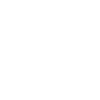

In [6]:
m = 210
n = 120

animated_gif = AnimatedGif(size=(m, n))
images = []
for i in range(len(CACHE)):
    
    animated_gif.add(CACHE[i], label=str(i), _stck = '1.0')

animated_gif.save('dla-animated_P3000_C200_S1_fps200.gif')

In [8]:
 ############# Jovian Course DSA #####################

In [11]:
############# Removes duplicates from a list in=place, and extra index j to keep track of unique numbers found ###

nums = [50,50,40,40,40,555,999]
j=1
for i in range(1,len(nums)):
    if nums[i-1]!=nums[i]:
        nums[j]=nums[i]
        j+=1
    else:
        pass
nums[j:len(nums)]=''

In [12]:
nums

[50, 40, 555, 999]

In [16]:
## Brute-force- to pick a given card named query with minimum traversal of list.

cards = [0, 1, 3, 4, 7, 10, 11, 13]
query = 55

def cards_pick(cards,query):
    k=0
    while k < len(cards):
        if cards[k]==query:
            return k
        return -1


In [32]:
cards_pick(cards,query)

-1

In [25]:
## Binary search tree

cards = [0, 1, 3, 4, 7, 10, 11, 13]
query = 66

def cards_pick(cards,query):
    
    lo,hi=0,len(cards)-1
    
    while lo <= hi:
        
        mid=lo+hi // 2
        me= cards[mid]
        
        if query==me:
            return mid
        elif query<me:
            hi=mid-1
        elif query>me:
            lo=mid+1
            
    return -1


In [26]:
cards_pick(cards,query)

-1

In [1]:
class User():
    def __init__(self,username,name,email):
        self.username=username
        self.name=name
        self.email=email
        
        

In [2]:
user2 = User('john', 'John Doe', 'john@doe.com')

In [3]:
class UserDatabase:
    def insert(self, user):
        pass
    
    def find(self, username):
        pass
    
    def update(self, user):
        pass
        
    def list_all(self):
        pass

In [4]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

In [5]:
users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal]